# MIE1624 Introduction to Data Science and Analytics

## Final Exam Project

## Zhaohui Qu - 1005783127

## 0.Background:
In response to the COVID-19 pandemic, the White House and a coalition of leading research
groups have prepared a dataset of open sourced research papers. This data-set is a resource of
over 45,000 scholarly articles, including over 33,000 with full text, about COVID-19, SARSCoV-2, and related coronaviruses. This freely available dataset is provided to the global research
community to apply recent advances in natural language processing and other AI techniques to
generate new insights in support of the ongoing fight against this infectious disease. There is a
growing urgency for these approaches because of the rapid acceleration in new coronavirus
literature, making it difficult for the medical research community to keep up and extract insight
from this growing body work.

### 0.1 The purpose of this assignment:
The goal of this project is to use NLP and other machine learning algorithms learned in this
course to develop a tool that can text-mine this database of research articles to gain useful
insights about COVID-19 and how we might be able to tackle the outbreak, contain the spread
and flatten the curve. The overarching insights that can be acquired from this dataset are
numerous and which aspect of the problem you decide to tackle is up to you. For example you
may choose to use this dataset to better understand the transmission, incubation and symptoms of
COVID-19, look to gain insights around which therapeutics and vaccines may hold promise and
warrant further investigation, or you may wish to investigate the risk factors that make COVID19 particularly deadly in some patients. The underlying goal of this project is to gain insights
from this dataset to better inform how our healthcare system, government, industries can tackle
this growing problem.

### 0.2 Import libraries needed for the project:

In [1]:
#!pip install --upgrade pip
#!pip3 install pandas numpy 
#!pip3 install 
#!pip3 install HTMLParser 
#!pip3 install nltk 
#!pip3 install wordcloud
#!pip install --upgrade gensim
#!pip install keras
#!pip install tensorflow

In [100]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Data cleaning (20 marks):

The dataset of research papers is provided to you as a .csv file and starter Python code is
provided to you that cleans the data by removing duplicate papers, making the text
contents easier to mine by adjusting formatting, and extracting useful fields from the
larger dataset such as authors, abstracts, date of publication and more. You may choose to
use this starter code and clean data that it produces, or if your chosen algorithm requires a
different format of data or approach, you are free to modify and/or write you own data
cleaning pipeline.

### 1.1 Load the Dataset:

In [2]:
metadata = pd.read_csv('metadata.csv')
print (metadata.shape)
metadata.head(10)

(45774, 17)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389
5,z3tgnzth,c41fdb2efd6d61384a92a84cbba3f8233629a41b,biorxiv,The infant airway microbiome in health and dis...,10.1101/012070,NaN,NaN,biorxiv,The nasopharynx (NP) is a reservoir for microb...,2014-12-02,Shu Mei Teo; Danny Mok; Kym Pham; Merci Kusel;...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/012070
6,1xxrnpg3,1dd898b5ca1ae70ec0e3cad89fc87a165002a99e,biorxiv,Using heterogeneity in the population structur...,10.1101/017178,NaN,NaN,biorxiv,"ABSTRACTIn 2013, U.S. swine producers were con...",2015-03-27,Eamon B. O’Dea; Harry Snelson; Shweta Bansal,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/017178
7,8ilzm51q,33565294e6bc67fb7ee14dcae6cfdb08148f4ea5,biorxiv,"Big city, small world: Density, contact rates,...",10.1101/018481,NaN,NaN,biorxiv,Macroscopic descriptions of populations common...,2015-04-27,Moritz U. G. Kraemer; T. Alex Perkins; Derek A...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/018481
8,wafvnbdu,3461d71f6890f7e5ba53bf168be3945cdb16d901,biorxiv,MERS-CoV recombination: implications about the...,10.1101/020834,NaN,NaN,biorxiv,Recombination is a process that unlinks neighb...,2015-06-12,Gytis Dudas; Andrew Rambaut,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/020834
9,4xocqn6o,1f9d3f9a1a0e8db6a086e0a2b5ba50cf9f235dae,biorxiv,On the causes of evolutionary transition:trans...,10.1101/027722,NaN,NaN,biorxiv,A pattern in which nucleotide transitions are ...,2015-09-28,Arlin Stoltzfus; Ryan W. Norris,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/027722


From the dataset we can see that there are some columns which are related to some identification numbers and contribute very limited or no information to our project, thus the columns picked which might contain useful informations are: **'title','abstract','authors','publish_time'**

### 1.2 Select useful columns

In [3]:
useful_cols = ['title','abstract','authors','publish_time']
metadata = metadata[useful_cols]
metadata = metadata.drop_duplicates(subset='abstract', keep="first")
metadata=metadata.dropna()
metadata=metadata.reset_index(drop=True)
metadata["abstract"] = metadata["abstract"].str.lower()
metadata["title"] = metadata["title"].str.lower()
metadata.head()

,title,abstract,authors,publish_time,url
0,siann: strain identification by alignment to n...,next-generation sequencing is increasingly bei...,Samuel Minot; Stephen D Turner; Krista L Ternu...,2014-01-10,https://doi.org/10.1101/001727
1,spatial epidemiology of networked metapopulati...,an emerging disease is one infectious epidemic...,Lin WANG; Xiang Li,2014-06-04,https://doi.org/10.1101/003889
2,sequencing of the human ig light chain loci fr...,germline variation at immunoglobulin gene (ig)...,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,2014-07-03,https://doi.org/10.1101/006866
3,bayesian mixture analysis for metagenomic comm...,deep sequencing of clinical samples is now an ...,Sofia Morfopoulou; Vincent Plagnol,2014-07-25,https://doi.org/10.1101/007476
4,mapping a viral phylogeny onto outbreak trees ...,developing methods to reconstruct transmission...,Stephen P Velsko; Jonathan E Allen,2014-11-11,https://doi.org/10.1101/010389


### 1.3 Text Cleaning

#### 1.3.1 Extract Articles Related with COVID-19 and SARS

Extract articles related with COVID-19 that contain COVID-19, SARS-CoV-2, 2019-nCov, SARS Coronavirus 2 or 2019 Novel Coronavirus in the abstract.
Extract articles related with SARS that only contain sars, sars-cov and sars-coronavirus in the abstract.

In [4]:
def Covid_19_and_Sars(tw_list):
    '''
    Input: a single tweet
    Output: Articles Related with COVID-19
    '''
    tw = tw_list
    # keywords 
    covid_19 = ['covid-19','2019-ncov','2019 novel coronavirus','ncov-2019','sars-cov-2','sars coronavirus 2']
    sars=['sars','sars-cov','sars-coronavirus']
    #,
    
    col = 'others'
        
    for key in covid_19 :   
        if key in tw:
            col='2019-ncov'
    for key in sars:
        if key in tw and col=='others':
            col='sars'
    
    return col

In [5]:
metadata['Label']='Other'
for i in range(len(metadata)):   
    label_determinant= Covid_19_and_Sars(metadata.abstract[i])
    metadata["Label"][i]=label_determinant

#### 1.3.2 Remove Punctuation

In [6]:
import re
metadata['cleanedabstract'] = metadata['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s-]',' ',x))
metadata['cleanedtitle'] = metadata['title'].apply(lambda x: re.sub('[^a-zA-z0-9\s-]',' ',x))


#### 1.3.3 Load the stop words library and Remove stop words

In [7]:
from nltk.corpus import stopwords 
# getting ntlk stop word list into dataframe
stop_words_ntlk=pd.DataFrame(data=list(stopwords.words('english')), columns=['word'])
stop_words_combined=stop_words_ntlk

In [8]:
#removing stop words 
metadata['cleanedabstract'] =metadata['cleanedabstract'] .apply(lambda x : x.split())
metadata['cleanedabstract']=metadata['cleanedabstract'].apply(lambda y : [word for word in y if word not in stop_words_combined.values])


In [9]:
print("The size of all article after cleaning is:\n",metadata.shape)

The size of all article after cleaning is:
 (37024, 8)


## 2.Data Visualization and Exploratory Data Analysis – [15 Marks]:
Depending on your overarching theme and questions that you wish to address about
COVID-19 present 3 graphical figures that visualize aspects or information in the data
that you will further explore with your models. How could these trends be used to help
with the task of methodically extracting all information and trends of this type? Consider
how accessing the data and creating these visualizations will inform how the data will
need to be pre-processed and fed into your models. All graphs should be readable and
presented in the notebook. All axes must be appropriately labeled. In addition to data
visualizations, perform exploratory data analysis in other forms, if necessary.

Extract articles that are classified into 2019-ncov

In [10]:
covid_19_metadata=metadata[metadata['Label'].str.contains("2019-ncov")]

In [11]:
covid_19_metadata.head(5)

,title,abstract,authors,publish_time,url,Label,cleanedabstract,cleanedtitle
92,a mathematical model for simulating the transm...,abstractas reported by the world health organi...,Tianmu Chen; Jia Rui; Qiupeng Wang; Zeyu Zhao;...,2020-01-19,https://doi.org/10.1101/2020.01.19.911669,2019-ncov,"[abstractas, reported, world, health, organiza...",a mathematical model for simulating the transm...
93,genomic and protein structure modelling analys...,abstractdetailed genomic and structure-based a...,Ning Dong; Xuemei Yang; Lianwei Ye; Kaichao Ch...,2020-01-21,https://doi.org/10.1101/2020.01.20.913368,2019-ncov,"[abstractdetailed, genomic, structure-based, a...",genomic and protein structure modelling analys...
94,host and infectivity prediction of wuhan 2019 ...,abstractthe recent outbreak of pneumonia in wu...,Qian Guo; Mo Li; Chunhui Wang; Peihong Wang; Z...,2020-01-24,https://doi.org/10.1101/2020.01.21.914044,2019-ncov,"[abstractthe, recent, outbreak, pneumonia, wuh...",host and infectivity prediction of wuhan 2019 ...
96,discovery of a novel coronavirus associated wi...,"since the sars outbreak 18 years ago, a large ...",Peng Zhou; Xing-Lou Yang; Xian-Guang Wang; Ben...,2020-01-23,https://doi.org/10.1101/2020.01.22.914952,2019-ncov,"[since, sars, outbreak, 18, years, ago, large,...",discovery of a novel coronavirus associated wi...
97,functional assessment of cell entry and recept...,"abstractover the past 20 years, several corona...",Michael Letko; Vincent Munster,2020-01-22,https://doi.org/10.1101/2020.01.22.915660,2019-ncov,"[abstractover, past, 20, years, several, coron...",functional assessment of cell entry and recept...


Extract articles that are classified into sars

In [12]:
sars_metadata=metadata[metadata['Label'].str.contains("sars")]

In [13]:
sars_metadata.head(5)

,title,abstract,authors,publish_time,url,Label,cleanedabstract,cleanedtitle
1,spatial epidemiology of networked metapopulati...,an emerging disease is one infectious epidemic...,Lin WANG; Xiang Li,2014-06-04,https://doi.org/10.1101/003889,sars,"[emerging, disease, one, infectious, epidemic,...",spatial epidemiology of networked metapopulati...
28,containing emerging epidemics: a quantitative ...,abstractstrategies for containing an emerging ...,Corey M Peak; Lauren M Childs; Yonatan H Grad;...,2016-08-31,https://doi.org/10.1101/072652,sars,"[abstractstrategies, containing, emerging, inf...",containing emerging epidemics a quantitative ...
60,mers-cov nsp16 necessary for ifn resistance an...,abstractcoronaviruses encode a mix of highly c...,Vineet D. Menachery; Lisa E. Gralinski; Hugh D...,2017-08-08,https://doi.org/10.1101/173286,sars,"[abstractcoronaviruses, encode, mix, highly, c...",mers-cov nsp16 necessary for ifn resistance an...
61,proofreading-deficient coronaviruses adapt ove...,abstractthe coronavirus (cov) rna genome is th...,Kevin W. Graepel; Xiaotao Lu; James Brett Case...,2017-08-11,https://doi.org/10.1101/175562,sars,"[abstractthe, coronavirus, cov, rna, genome, l...",proofreading-deficient coronaviruses adapt ove...
64,complemented palindrome small rnas first disco...,"abstractin this study, we reported for the fir...",Chang Liu; Ze Chen; Wenyuan Shen; Deshui Yu; S...,2017-09-07,https://doi.org/10.1101/185876,sars,"[abstractin, study, reported, first, time, exi...",complemented palindrome small rnas first disco...


In [14]:
covid_19_metadata=covid_19_metadata.reset_index(drop=True)
covid_19_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 8 columns):
title              1457 non-null object
abstract           1457 non-null object
authors            1457 non-null object
publish_time       1457 non-null object
url                1457 non-null object
Label              1457 non-null object
cleanedabstract    1457 non-null object
cleanedtitle       1457 non-null object
dtypes: object(8)
memory usage: 91.2+ KB


In [15]:
sars_metadata=sars_metadata.reset_index(drop=True)
sars_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 8 columns):
title              3007 non-null object
abstract           3007 non-null object
authors            3007 non-null object
publish_time       3007 non-null object
url                3007 non-null object
Label              3007 non-null object
cleanedabstract    3007 non-null object
cleanedtitle       3007 non-null object
dtypes: object(8)
memory usage: 188.1+ KB


In [16]:
metadata=metadata.reset_index(drop=True)
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37024 entries, 0 to 37023
Data columns (total 8 columns):
title              37024 non-null object
abstract           37024 non-null object
authors            37024 non-null object
publish_time       37024 non-null object
url                37024 non-null object
Label              37024 non-null object
cleanedabstract    37024 non-null object
cleanedtitle       37024 non-null object
dtypes: object(8)
memory usage: 2.3+ MB


### 2.1 Display the most frequently used words in the literatures using WordCloud

Display WorldCloud for articles about COVID-19

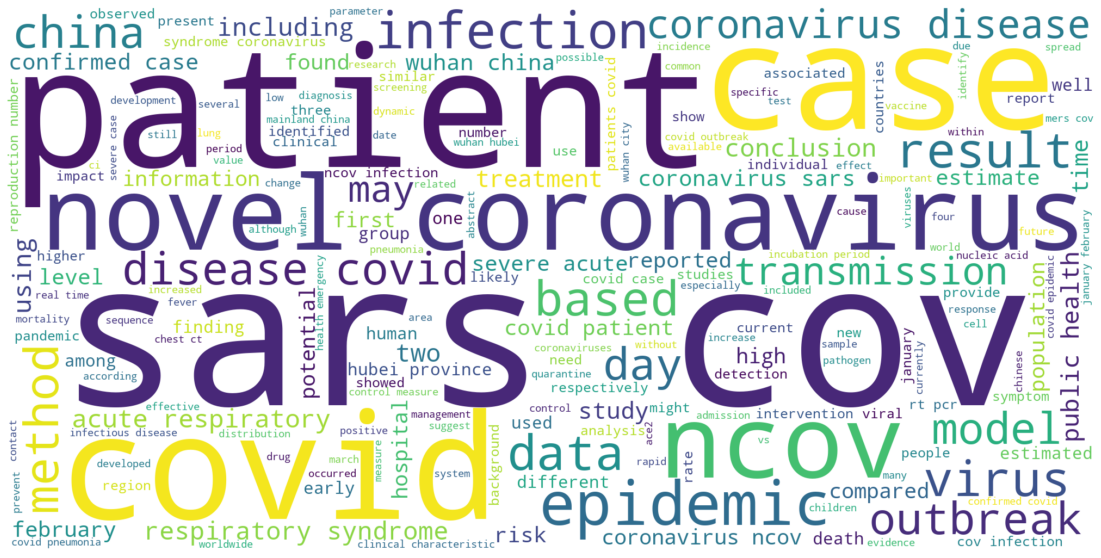

In [17]:
from wordcloud import WordCloud
#worldcloud_abstract=metadata.abstract
worldcloud_abstract=covid_19_metadata.cleanedabstract.apply(lambda x:" ".join(x))
worldcloud_abstract=" ".join(worldcloud_abstract)
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 2000, height = 1000,background_color="white").generate(worldcloud_abstract)
# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Display WorldCloud for articles about SARS

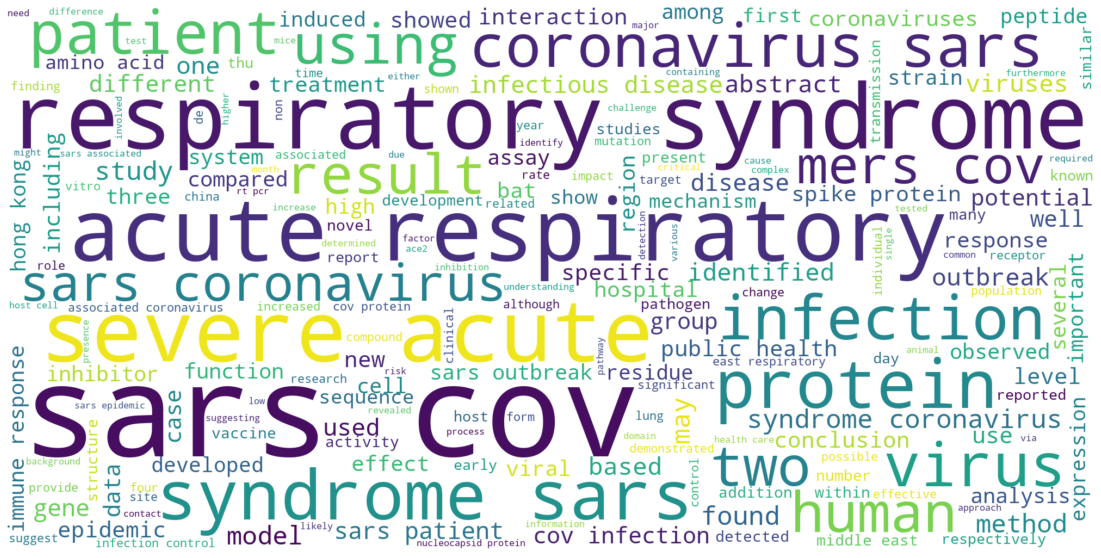

In [18]:
from wordcloud import WordCloud
worldcloud_sars=sars_metadata.cleanedabstract.apply(lambda x:" ".join(x))
worldcloud_sars=" ".join(worldcloud_sars)
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 2000, height = 1000,background_color="white").generate(worldcloud_sars)
# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the abstract, the most commonly used words are similar in both graph, like "sars","cov","coronavirus",etc. But in Wordcloud of COVID-19, "novel" is an obvious word, which means that COVID-19 is different from previous coronavirus. To help people avoid being infected, I am going to find the risks factors of COVID-19.

### 2.2 Tagged Articles by Publication Month

The following graph shows articles by publication month. All of the articles have a publication date of 2020 or later (or the date is null). Many publication dates only include the year but there is a significant portion of articles this month, which shows the rapid pace things are moving. Also note that some publication dates are in the future. The articles have been released early to help find answers

In [19]:
covid_19_metadata['publish_year_month']=covid_19_metadata['publish_time'].apply(lambda x: x[:-3])
metadata['publish_year_month']=metadata['publish_time'].apply(lambda x: x[:-6])
sars_metadata['publish_year_month']=sars_metadata['publish_time'].apply(lambda x: x[:-6])

In [20]:
covid_19_metadata['publish_year_month'].unique()

array(['2020-01', '2020-02', '2020-03', '2', '2019-12', '2020-04',
       '2020-05', '2020-06', '2020-12', '2020-07', '2020-08'],
      dtype=object)

In [21]:
metadata['publish_year_month'].unique()

array(['2014', '2015', '2016', '2017', '2019', '2020', '2018', '', '2012',
       '2003', '2004', '2005', '2006', '1995', '1998', '1999', '1990',
       '2007', '1965', '1997', '1955', '1957', '1963', '1967', '1970',
       '2001', '2000', '2008', '1996', '2002', '2009', '2010', '2011',
       '2013', '1994', '1973', '1982', '1986', '1985', '1988', '1993',
       '1981', '1991', '1984', '1989', '1971', '1992', '1974', '1987',
       '1983', '1977', '1978', '1975', '1972', '1979', '1980', '1976',
       '1968', '1969'], dtype=object)

In [22]:
sars_metadata['publish_year_month'].unique()

array(['2014', '2016', '2017', '2019', '2020', '2018', '', '2012', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2013', '2015'], dtype=object)

In [23]:
year_month_count = dict()
year_month_count ['2019-12']=0
year_month_count ['2020-01']=0
year_month_count ['2020-02']=0
year_month_count ['2020-03']=0
year_month_count ['2020-04']=0
year_month_count ['2020-05']=0
year_month_count ['2020-06']=0
year_month_count ['2020-07']=0
year_month_count ['2020-08']=0
year_month_count ['2020-12']=0

for year in covid_19_metadata['publish_year_month']:
  if not (year == '2'):
    if year in year_month_count:
      year_month_count[year] +=1

In [24]:
year_count = dict((year,0) for year in range(1980,2021))

for year in metadata['publish_year_month']:
  if not (year == ''):
    if int(year) in year_count:
      year_count[int(year)] +=1

In [25]:
sars_year_count = dict((year,0) for year in range(2003,2021))

for year in sars_metadata['publish_year_month']:
  if not (year == ''):
    if int(year) in year_count:
      sars_year_count[int(year)] +=1

Text(0, 0.5, 'Published paper in the 2019&2020')

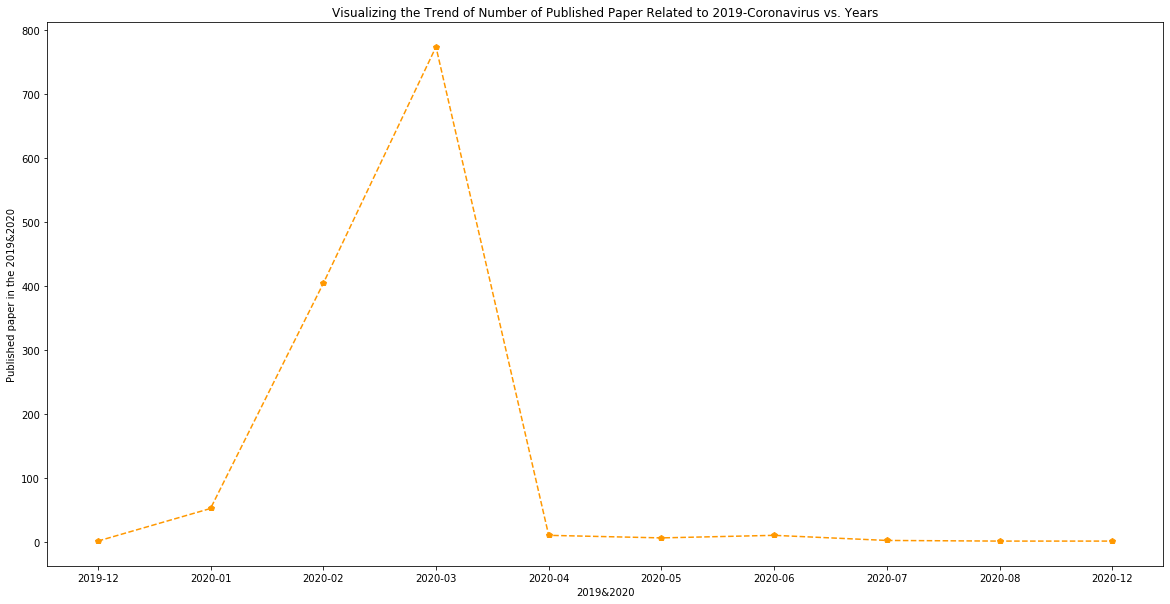

In [26]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.plot(range(len(year_month_count)),list(year_month_count.values()),'p--',color='#ff9800')
plt.xticks(range(len(year_month_count)), list(year_month_count.keys()))
plt.title('Visualizing the Trend of Number of Published Paper Related to 2019-Coronavirus vs. Years')
plt.xlabel('2019&2020')
plt.ylabel('Published paper in the 2019&2020')

Text(0, 0.5, 'Published paper in the Year')

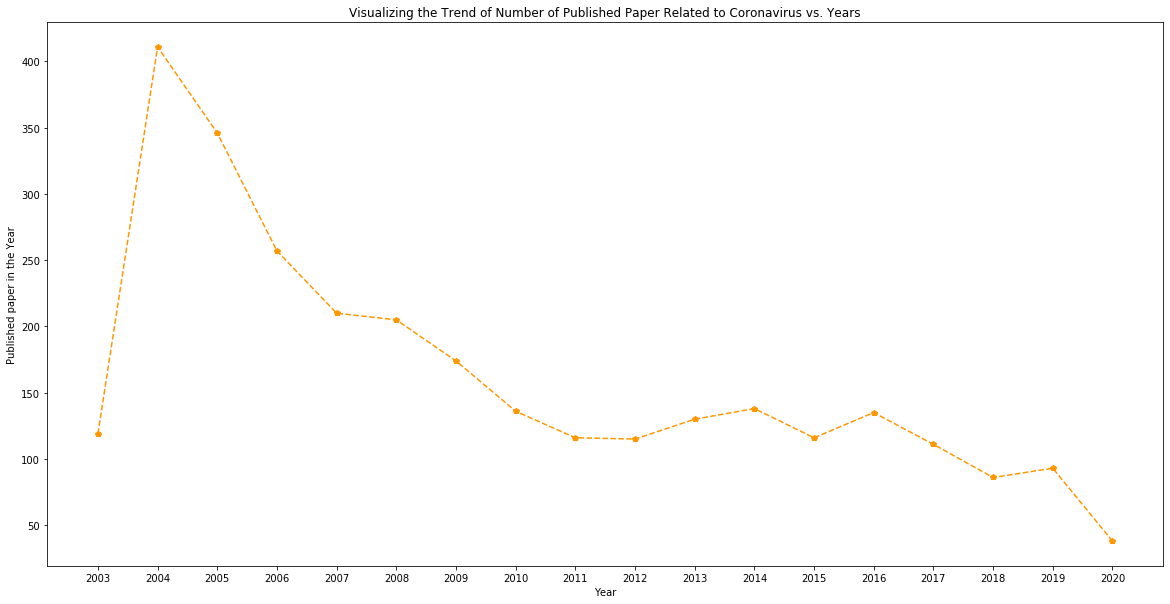

In [27]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.plot(range(len(sars_year_count)),list(sars_year_count.values()),'p--',color='#ff9800')
plt.xticks(range(len(sars_year_count)), list(sars_year_count.keys()))
plt.title('Visualizing the Trend of Number of Published Paper Related to Coronavirus vs. Years')
plt.xlabel('Year')
plt.ylabel('Published paper in the Year')

Text(0, 0.5, 'Published paper in the Year')

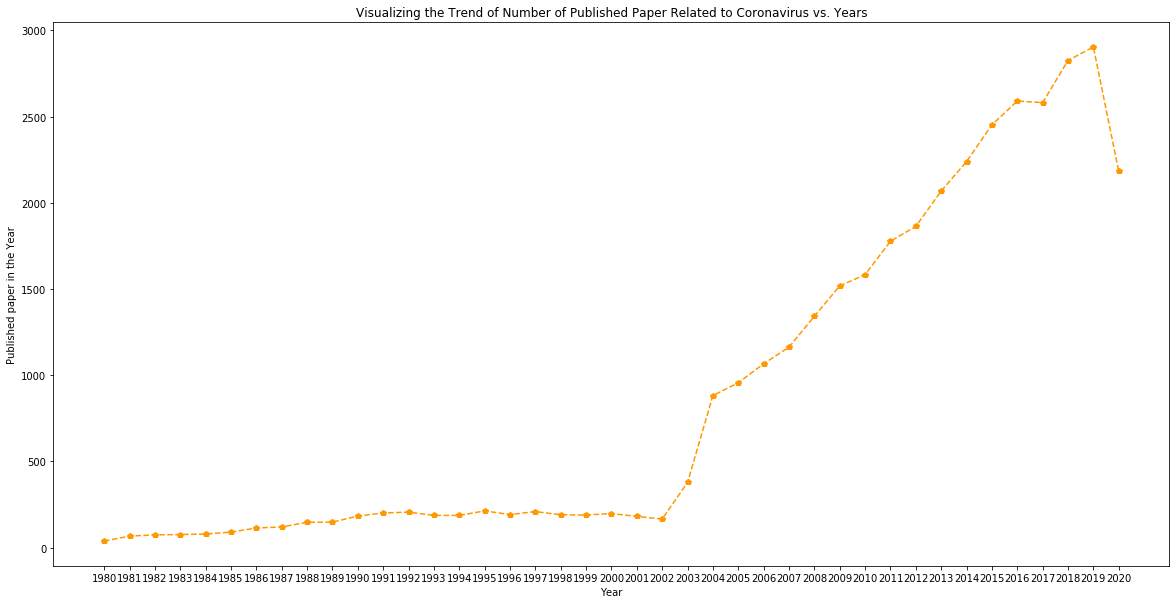

In [28]:
plt.figure(num=None, figsize=(20, 10), facecolor='w', edgecolor='k')
plt.plot(range(len(year_count)),list(year_count.values()),'p--',color='#ff9800')
plt.xticks(range(len(year_count)), list(year_count.keys()))
plt.title('Visualizing the Trend of Number of Published Paper Related to Coronavirus vs. Years')
plt.xlabel('Year')
plt.ylabel('Published paper in the Year')

A very interesting trend can be found that before 2003, the number of published papers related to coronavirus was about less than 500 per year while after 2003, there was a tremendous increase in the number of published papers per year which related to coronavirus. In 2004, there were about twice as many papers published compared to 2003. One possible reason is that in 2003 there was a large global outbreak of SARS coronavirus which stimulated people's demands in doing more research in the topic of the coronavirus.  
The number of published papers related with COVID-19 also increased dramatically from 2019.12 to 2020.3, We can see that more and more scientists devoted themself to find all possible ways to defend the COVID-19 

### 2.3 Display the most frequently mentioned risks factors in the literatures

- Smoking, pre-existing pulmonary disease
- Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities
- Neonates and pregnant women

Reference:https://www.hopkinsmedicine.org/health/conditions-and-diseases/coronavirus/coronavirus-and-covid19-who-is-at-higher-risk

In [29]:
#Define the keywords related to each risks factors
risk_key_map = dict()
risk_key_map['young_adults']=['young','younger']
risk_key_map['older_adults'] = ['aged','older','old','elder','elderly']
risk_key_map['pre_existing_pulmonary_disease'] = ['pulmonary','smoking','smoker','asthma','smokers']
risk_key_map['neonates'] = ['newborn','neonates','baby']
risk_key_map['pregnant_woman']=['pregnant']
risk_key_map['heart disease']=['hypertension','heart']
risk_key_map['diabetes']=['diabetes']
risk_key_map['other_disease'] = ['cancer','hiv','marrow','transplantation','aids','corticosteroids','obesity']


In [30]:
risk_count_sars=dict()
for key in risk_key_map:
    risk_count_sars[key] = 0

#loop through the dataset and count what kind of risk factor is mentioned most
def risk_factor_sars(list):
    for key in risk_key_map:
        for factor in risk_key_map[key]:
            if factor in list:
                risk_count_sars[key]+=1

for i in range(len(sars_metadata)):   
    risk_factor_sars(sars_metadata.cleanedabstract[i])


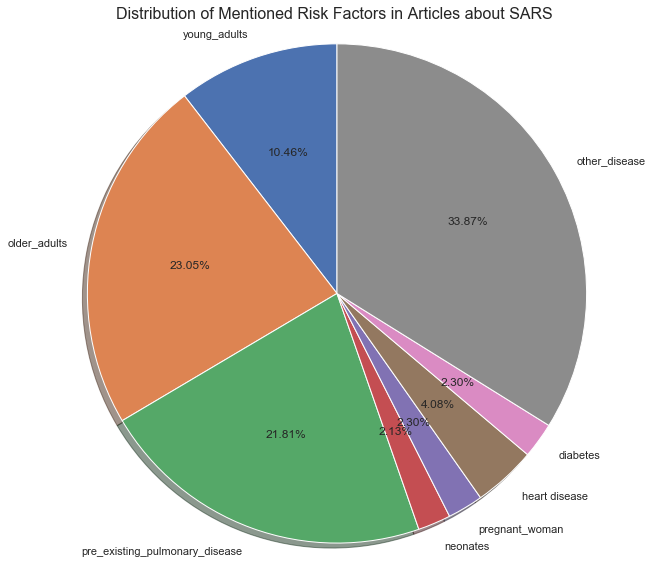

In [178]:
labels = list(risk_count_sars.keys())
sizes = list(risk_count_sars.values())
explode = (0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Distribution of Mentioned Risk Factors in Articles about SARS', fontsize=16)
plt.show()

In [32]:
risk_count_19=dict()
for key in risk_key_map:
    risk_count_19[key] = 0

#loop through the dataset and count what kind of risk factor is mentioned most
def risk_factor_19(list):
    for key in risk_key_map:
        for factor in risk_key_map[key]:
            if factor in list:
                risk_count_19[key]+=1

for i in range(len(covid_19_metadata)):   
    risk_factor_19(covid_19_metadata.cleanedabstract[i])

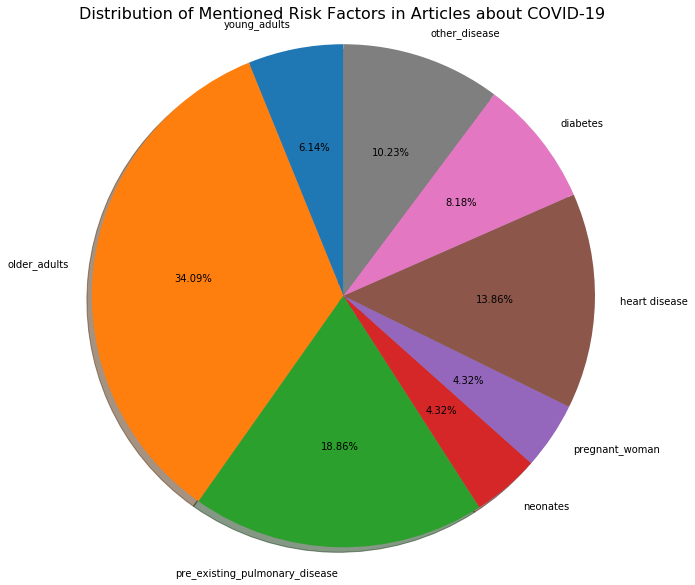

In [33]:
labels = list(risk_count_19.keys())
sizes = list(risk_count_19.values())
explode =(0, 0, 0, 0, 0, 0, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', startangle=90, shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Distribution of Mentioned Risk Factors in Articles about COVID-19', fontsize=16)
plt.show()

We can see that the most mentioned risk factors about sars is other disease like 'cancer','hiv','marrow','transplantation','aids','corticosteroids','obesity'. But the most mentioned risk factors about COVID-19 is older adults. We can see that older people are more likely to be infected.

## 3.Model Selection and Fitting to Data

Select a machine learning model of your choice (you may select an unsupervised or
supervised machine learning model depending on your approach) that will allow you to
study some aspect of COVID-19 from the corpus of research articles. You must justify
your algorithm choices and the approach you will use to fit your model using the dataset
provided. You may also choose to study multiple models and report on the suitability of
each in addressing your overarching question regarding COVID-19. You should also use
the dataset provided to train the models selected and discuss and interpret the findings of
these models. You may also use this section to improve the model depending on the
findings of your models and how you interpret them.

### 3.1 Perform unsupervised Machine Learning using K-Means Clustering

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
def Tf_Idf_feature(data):
    vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',max_features = 2000)
    vectors = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names()
    print(len(feature_names))
    return vectorizer,vectors

In [108]:
selected_metadata=covid_19_metadata.append(sars_metadata)

In [111]:
vectorizer_metadata,metdada_X=Tf_Idf_feature(selected_metadata['cleanedabstract'].apply(lambda x:" ".join(x)))

2000


In [85]:
from sklearn.cluster import MiniBatchKMeans
k = 2   #Targeting 5 classes since initially I picked 5 types of coronavirus
kmeans = MiniBatchKMeans(n_clusters=k,random_state=11)
y_pred = kmeans.fit_predict(metdada_X)

In [67]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)
X_tsne = tsne.fit_transform(metdada_X.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4464 samples in 0.287s...
[t-SNE] Computed neighbors for 4464 samples in 78.527s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4464
[t-SNE] Computed conditional probabilities for sample 2000 / 4464
[t-SNE] Computed conditional probabilities for sample 3000 / 4464
[t-SNE] Computed conditional probabilities for sample 4000 / 4464
[t-SNE] Computed conditional probabilities for sample 4464 / 4464
[t-SNE] Mean sigma: 0.299921
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.910370
[t-SNE] KL divergence after 1000 iterations: 1.946005


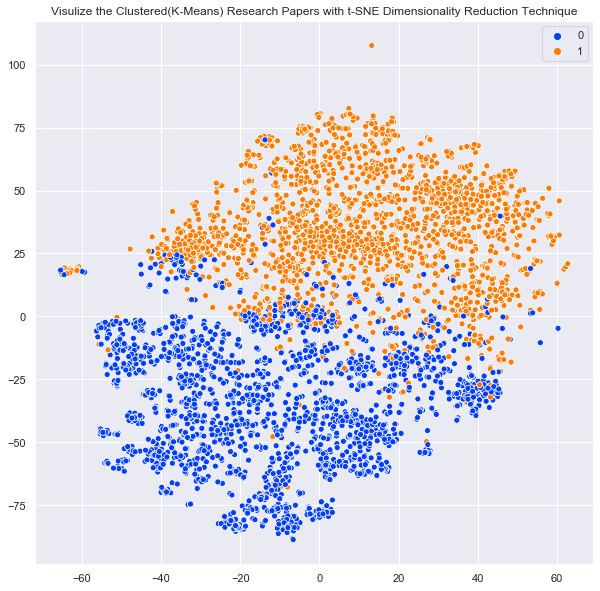

In [177]:
import seaborn as sns
#Set the plot size and color
sns.set(rc={'figure.figsize':(10,10)})
palette = sns.color_palette("bright", len(set(y_pred)))

# plot the diagram
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("Visulize the Clustered(K-Means) Research Papers with t-SNE Dimensionality Reduction Technique")
plt.show()

In [117]:
import asyncio
import collections

#This function is used to display the most commonly used words in a dataset
def show_common_words(df,num):
  world_freq_counter = collections.Counter()
  for i in range(len(df)):
      world_freq_counter.update((str(df['cleanedtitle'].iloc[i])).split(' '))
  print("Print out the top 50 most commonly used words")
  for i in world_freq_counter.most_common(num):
    print(i)

In [113]:
#add a column at the end of the dataset to show the predicted class from K-Means
metadata_pred = selected_metadata
metadata_pred['predicted'] = y_pred

In [123]:
#Class 0
df0 = metadata_pred[metadata_pred['predicted'] == 0]
show_common_words(df0,50)

Print out the top 50 most commonly used words
('of', 2063)
('', 1267)
('and', 1159)
('coronavirus', 1083)
('the', 1070)
('in', 725)
('respiratory', 616)
('a', 555)
('acute', 524)
('syndrome', 515)
('sars', 512)
('severe', 505)
('protein', 482)
('for', 392)
('sars-cov', 351)
('by', 298)
('to', 263)
('with', 244)
('human', 230)
('spike', 213)
('virus', 209)
('from', 185)
('infection', 150)
('coronaviruses', 145)
('novel', 140)
('protease', 130)
('viral', 130)
('on', 128)
('nucleocapsid', 128)
('cells', 126)
('as', 122)
('an', 118)
('against', 117)
('is', 112)
('rna', 111)
('sars-cov-2', 111)
('expression', 107)
('replication', 103)
('cell', 101)
('domain', 96)
('characterization', 96)
('proteins', 91)
('inhibitors', 90)
('identification', 90)
('receptor', 89)
('analysis', 87)
('vaccine', 85)
('detection', 84)
('structure', 79)
('antibodies', 79)


In [121]:
virus_type_encoder = {
    'sars':0,
    '2019-ncov':1,
}
metadata_pred['virus_type_code'] = metadata_pred['Label'].apply(lambda x: virus_type_encoder[x])

In [126]:
from sklearn.metrics import accuracy_score
class0_acc = round(accuracy_score(df0['virus_type_code'], df0['predicted']),3)
print("Set the current class as SARS, the predicted accuracy is:\n",class0_acc)

Set the current class as SARS-Cov, the predicted accuracy is:
 0.899


In [128]:
#Class 1
df1 = metadata_pred[metadata_pred['predicted'] == 1]
show_common_words(df1,50)

Print out the top 50 most commonly used words
('', 2402)
('of', 1906)
('the', 1244)
('in', 1159)
('and', 1020)
('covid-19', 658)
('a', 639)
('coronavirus', 573)
('for', 432)
('sars', 423)
('respiratory', 352)
('with', 329)
('novel', 327)
('china', 322)
('severe', 307)
('acute', 300)
('2019', 296)
('to', 296)
('syndrome', 293)
('outbreak', 264)
('disease', 264)
('on', 262)
('patients', 236)
('from', 213)
('clinical', 200)
('infection', 185)
('epidemic', 174)
('transmission', 152)
('an', 150)
('2019-ncov', 148)
('health', 147)
('study', 137)
('during', 129)
('sars-cov-2', 126)
('control', 120)
('wuhan', 118)
('pneumonia', 113)
('analysis', 110)
('cases', 106)
('characteristics', 89)
('impact', 87)
('infectious', 86)
('hong', 80)
('public', 78)
('hospital', 78)
('kong', 78)
('by', 75)
('emerging', 75)
('diseases', 73)
('case', 72)


In [130]:
class1_acc = round(accuracy_score(df1['virus_type_code'], df1['predicted']),3)
print("Set the current class as COVID-19, the predicted accuracy is:\n",class1_acc)

Set the current class as COVID-19, the predicted accuracy is:
 0.552


### 3.2 Perform unsupervised Machine Learning using Hierarchical Clustering

In [145]:
metadata_df=selected_metadata[['cleanedabstract','Label']]

In [156]:
metadata_df=metadata_df.reset_index(drop=True)
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464 entries, 0 to 4463
Data columns (total 2 columns):
cleanedabstract    4464 non-null object
Label              4464 non-null object
dtypes: object(2)
memory usage: 69.9+ KB


In [160]:
replace_dict=dict()
replace_dict['older_adults']=['aged','older','old','elder','elderly']
replace_dict['pre_existing_pulmonary_disease']=['pulmonary','smoking','smoker','asthma','smokers']
replace_dict['newborn']=['newborn','neonates','baby']
replace_dict['hypertension']=['hypertension','heart']

In [161]:
def replace_similar_word(list):
    for key in replace_dict:
        for factor in replace_dict[key]:
            if factor in list:
                list.replace(factor,replace_dict[key][0]);
    return list.split()

In [162]:
for i in range(len(metadata_df)):   
    metadata_df.cleanedabstract[i]=replace_similar_word(' '.join(metadata_df.cleanedabstract[i]))

In [ ]:
risk_key_map['young_adults']=['young','younger']
risk_key_map['older_adults'] = ['aged','older','old','elder','elderly']
risk_key_map['pre_existing_pulmonary_disease'] = ['pulmonary','smoking','smoker','asthma','smokers']
risk_key_map['neonates'] = ['newborn','neonates','baby']
risk_key_map['pregnant_woman']=['pregnant']
risk_key_map['heart disease']=['hypertension','heart']
risk_key_map['diabetes']=['diabetes']
risk_key_map['other_disease'] = ['cancer','hiv','marrow','transplantation','aids','corticosteroids','obesity']

In [163]:
risks=['young','aged','pulmonary','newborn','pregnant','hypertension','diabetes','cancer','hiv','covid_19','sars']

In [164]:
#Define the metric that will be used to define the "distance" metric used in the heirarchical clustering algorithm
risks_dist = np.zeros((len(risks),len(risks)), dtype=float)
print(risks_dist)
df_risks = pd.DataFrame(risks_dist, columns=risks, index=risks)
df_risks

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


,young,aged,pulmonary,newborn,pregnant,hypertension,diabetes,cancer,hiv,covid_19,sars
young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aged,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pulmonary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
newborn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pregnant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hypertension,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
diabetes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cancer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hiv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
covid_19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
metadata_df.head()

,cleanedabstract,Label
0,"[abstractas, reported, world, health, organiza...",2019-ncov
1,"[abstractdetailed, genomic, structure-based, a...",2019-ncov
2,"[abstractthe, recent, outbreak, pneumonia, wuh...",2019-ncov
3,"[since, sars, outbreak, 18, years, ago, large,...",2019-ncov
4,"[abstractover, past, 20, years, several, coron...",2019-ncov


In [168]:
risk_list = ['young','aged','pulmonary','newborn','pregnant','hypertension','diabetes','cancer','hiv']
virus_list = ['covid_19','sars']

virus_key_map = dict()
virus_key_map['covid_19']=['covid-19','2019-ncov','2019 novel coronavirus','ncov-2019','sars-cov-2','sars coronavirus 2']
virus_key_map['sars']=['sars','sars-cov','sars-coronavirus']
#Function used to determine if one type of coronavirus is mentioned in the abstract
def if_virus_in_abstract(virusname,abstract):
  keywords_list = virus_key_map[virusname]
  for keyword in keywords_list:
    if keyword in abstract:
      return True
  return False

In [170]:
#Function used for calculating the distance (Refernce: MIE1624 Tutorial)
def distance(t1, t2, df):

    #t1 and t2 can be either risk or type of virus
    if t1 == t2:
      return 0

    #if both t1 and t2 are risks
    if (t1 in risk_list) and (t2 in risk_list):
      risk1 = t1
      risk2 = t2
      cum_sum = 0
      number_of_papers = 0    
      for abstract in df['cleanedabstract']:
        if ((risk1 in abstract) and (risk2 in abstract)):
          number_of_papers += 1
          cum_sum -= 1
        elif (((risk1 in abstract) and (risk2 not in abstract)) or ((risk1 not in abstract) and (risk2 in abstract))):
          number_of_papers += 1
          cum_sum += 1
      return cum_sum/number_of_papers
    
    #if one is risk and one is virus
    elif (t1 in risk_list) and (t2 in virus_list):
      risk = t1
      virus = t2
      cum_sum = 0
      number_of_papers = 0
      
      for abstract in df['cleanedabstract']:
        if ((risk in abstract) and if_virus_in_abstract(virus,abstract)):
          number_of_papers += 1
          cum_sum -= 1
        elif (((risk in abstract) and  not if_virus_in_abstract(virus,abstract)) or ((risk not in abstract) and if_virus_in_abstract(virus,abstract))):
          number_of_papers += 1
          cum_sum += 1
      return cum_sum/number_of_papers
    
    #if one term is virus one is symptom
    elif (t2 in risk_list) and (t1 in virus_list):
      risk = t2
      virus = t1
      cum_sum = 0
      number_of_papers = 0
      
      for abstract in df['cleanedabstract']:
        if (if_virus_in_abstract(virus,abstract) and (risk in abstract)):
          number_of_papers += 1
          cum_sum -= 1
        elif ((if_virus_in_abstract(virus,abstract) and (risk not in abstract)) or ( not if_virus_in_abstract(virus,abstract) and (risk in abstract))):
          number_of_papers += 1
          cum_sum += 1
      return cum_sum/number_of_papers
    
    #if both terms are virus
    else:
      virus1 = t1
      virus2 = t2
      cum_sum = 0
      number_of_papers = 0
      
      for abstract in df['cleanedabstract']:
          if if_virus_in_abstract(virus1,abstract) and if_virus_in_abstract(virus2,abstract):
              number_of_papers += 1
              cum_sum -= 1
          elif ((if_virus_in_abstract(virus1,abstract) and not if_virus_in_abstract(virus2,abstract)) or (not if_virus_in_abstract(virus1,abstract) and if_virus_in_abstract(virus2,abstract))):
              number_of_papers += 1
              cum_sum += 1
      return cum_sum/number_of_papers

In [171]:
for i in range(len(risks)):
    for j in range(len(risks)):
        risks_dist[i][j] = distance(risks[i],risks[j], metadata_df)**6

In [172]:
risks_factor = pd.DataFrame(risks_dist, columns=risks, index=risks)
print('Our distance matrix looks like this:')   
risks_factor

Our distance matrix looks like this:


,young,aged,pulmonary,newborn,pregnant,hypertension,diabetes,cancer,hiv,covid_19,sars
young,0.000000,0.142564,0.454293,0.810140,0.860701,0.756449,0.776725,0.780783,0.920043,0.913554,0.866872
aged,0.142564,0.000000,0.650068,0.846473,0.881332,0.695067,0.561374,0.900085,0.927305,0.778366,0.874115
pulmonary,0.454293,0.650068,0.000000,0.935851,0.835259,0.435564,0.484568,0.801538,1.000000,0.615829,0.638344
newborn,0.810140,0.846473,0.935851,0.000000,0.141914,1.000000,1.000000,0.813087,1.000000,0.958938,0.992581
pregnant,0.860701,0.881332,0.835259,0.141914,0.000000,1.000000,1.000000,0.862297,1.000000,0.852231,0.938537
hypertension,0.756449,0.695067,0.435564,1.000000,1.000000,0.000000,0.000032,0.560592,1.000000,0.747774,0.974438
diabetes,0.776725,0.561374,0.484568,1.000000,1.000000,0.000032,0.000000,0.440673,0.919507,0.742508,0.945910
cancer,0.780783,0.900085,0.801538,0.813087,0.862297,0.560592,0.440673,0.000000,0.707924,0.839549,0.904132
hiv,0.920043,0.927305,1.000000,1.000000,1.000000,1.000000,0.919507,0.707924,0.000000,0.923507,0.714189
covid_19,0.913554,0.778366,0.615829,0.958938,0.852231,0.747774,0.742508,0.839549,0.923507,0.000000,0.443630


In [173]:
import scipy.cluster.hierarchy as sch
# Distance was magnified prior to Hierarchical Clustering
Y = sch.linkage(risks_dist, method='centroid')

/Users/qzh/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Dendrogram Displaying COVID-19 Symptom Clusters')

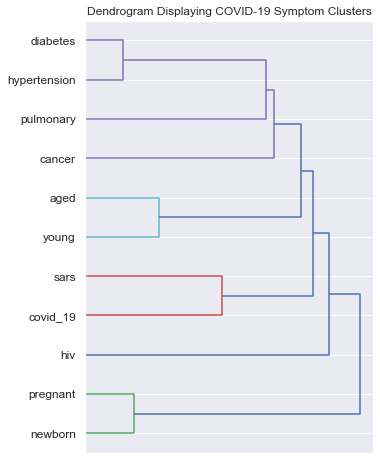

<Figure size 1008x1008 with 0 Axes>

In [175]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_axes([0.1,0.1,0.4,0.6])

# Get the dendrogram
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
labels = risks_factor.columns[Z1['leaves']]
ax1.set_yticklabels(labels)
ax1.set_title("Dendrogram Displaying COVID-19 Symptom Clusters")
#plt.savefig('COVID_clustering.png', format='png', bbox_inches='tight', dpi=600)

## 4.Deriving insights about policy and guidance to tackle the outbreak based on model findings – [30 Marks]:

Using the findings from your NLP model and text mining 35,000 unique biomedical
research papers on the coronavirus you are now tasked with discussing and proposing
how scientists, doctors, nurses, healthcare professionals, industry and governments can
best use the insights from your data science model to assist in the fight against the
COVID-19 pandemic. Use the insights derived about the disease from your model and
your data analysis to justify proposed policies or action items.

(The order laid out here does not need to be strictly followed. A significant number of
marks in each section are allocated to discussion. Use markdown cells in Jupyter notebook
as needed to explain your reasoning for the steps that you take.)

<a href=https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/what-you-can-do.html>Reference</a>

### 4.1 People Who Are at Higher Risk for Severe Illness

Based on the findings from our NLP model, older adults and people of any age who have serious underlying medical conditions might be at higher risk for severe illness from COVID-19.

#### 4.1.1 Older People

Older adults and people who have severe underlying medical conditions like heart or lung disease or diabetes seem to be at higher risk for developing more serious complications from COVID-19 illness

#### 4.1.2 People with Pre-existing Pulmonary Disease

People who had pre-existing pulmonary disease, like asthma, are more likely to be infected by COVID-19. And people with moderate to severe asthma may be at higher risk of getting very sick from COVID-19.  COVID-19 can affect your respiratory tract (nose, throat, lungs), cause an asthma attack, and possibly lead to pneumonia and acute respiratory disease.

#### 4.1.3 Immunocompromised People

Many conditions can cause a person to be immunocompromised, including cancer treatment, HIV, bone marrow or organ transplantation, immune deficiencies, poorly controlled HIV or AIDS, and prolonged use of corticosteroids and other immune weakening medications

### 4.2 What should we do?

#### 4.2.1 Steps you can take

If you are at higher risk for serious illness from COVID-19 because of your age or because you have a serious long-term health problem, it is extra important for you to take actions to reduce your risk of getting sick with the disease.

- Stay home if possible.
- Wash your hands often.
- Take everyday precautions to keep space between yourself and others (stay 6 feet away, which is about two arm lengths).
- Keep away from people who are sick.
- Stock up on supplies.
- Clean and disinfect frequently touched services.
- Avoid all cruise travel and non-essential air travel.
- Call your healthcare professional if you have concerns about COVID-19 and your underlying condition or if you are sick.

#### 4.2.2 Have a plan for if you get sick

- Know how to stay in touch with others by phone or email. You may need to ask for help from friends, family, neighbors, and community health workers if you become sick.
- Determine who can care for you if your caregiver gets sick.
- Contact your healthcare provider to ask about obtaining extra necessary medications to have on hand in case there is an outbreak of COVID-19 in your community and you need to stay home for a prolonged period of time.
- If you cannot get extra medications, consider using mail-order for medications.
- Be sure you have over-the-counter medicines and medical supplies (tissues, etc.) to treat fever and other symptoms. - Most people will be able to recover from COVID-19 at home.
- Have enough household items and groceries on hand so that you will be prepared to stay at home.
- Consider ways of getting medications and food brought to your house through family, social, or commercial networks.